# Identifying cause and effect from multivariate data

In [6]:
import numpy as np
import altair as alt
import pandas as pd

In [7]:
size = 50
A = np.array([np.random.normal(0, 10) for i in range(size)])
B = np.array([0]*5 + list(1.2*A[:-5] + 20))
C = [0]*5 + list(0.5*B[:-5] + 30) 
data = pd.DataFrame({"A":A, "B":B, "C":C}, index=pd.RangeIndex(len(A), name='index'))

## Causal Inference from correlation is illusive

In [8]:
AB = alt.Chart(data).mark_circle().encode(
    x="A",
    y="B")
BC= alt.Chart(data).mark_circle().encode(
    x="B",
    y="C")
AC = alt.Chart(data).mark_circle().encode(
    x="A",
    y="C")

alt.hconcat(AB, BC, AC)

alt.HConcatChart(...)

And simple scatter plot of values of A, B and C gives some idea of correlation but not causality.

## Which is cause and which is effect?

In [11]:
source = data.reset_index().melt("index", var_name="variable", value_name="y")

def line_plot(source):    
    # The basic line
    line = alt.Chart(source).mark_line(interpolate="basis").encode(
        x="index:Q",
        y="y:Q",
        color="variable:N"
    )
    return line.properties(width=600,
                        height=400).interactive()

line_plot(source)

alt.Chart(...)

The line plot shows plot of three variables A, B and C. If you follow contours of graphs, it is easy to find out
that C takes up contour of B with lag of 5 and B takes up contour of A with lag of 5. Actually data has causality
pathway like this **C is effect of B and B is effect of A** 

## What About Complex Causal Networks?

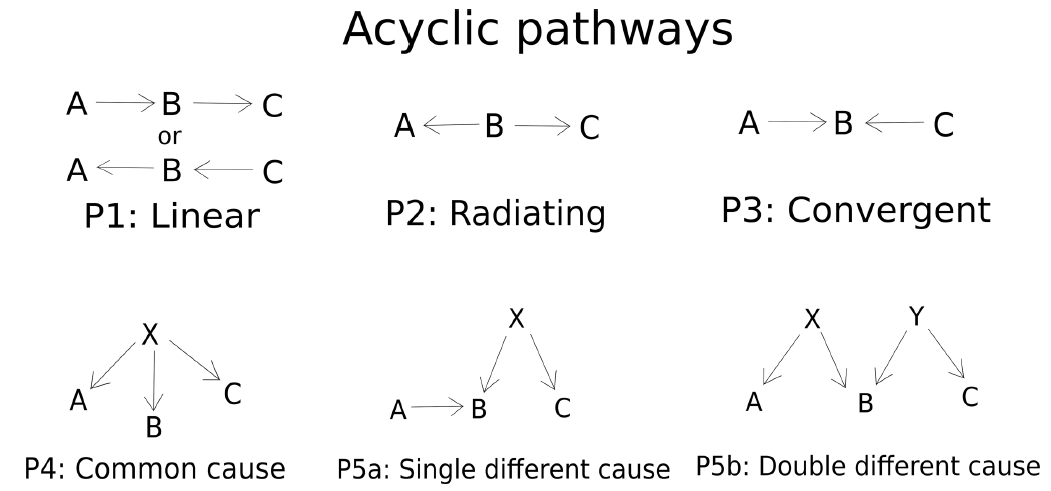

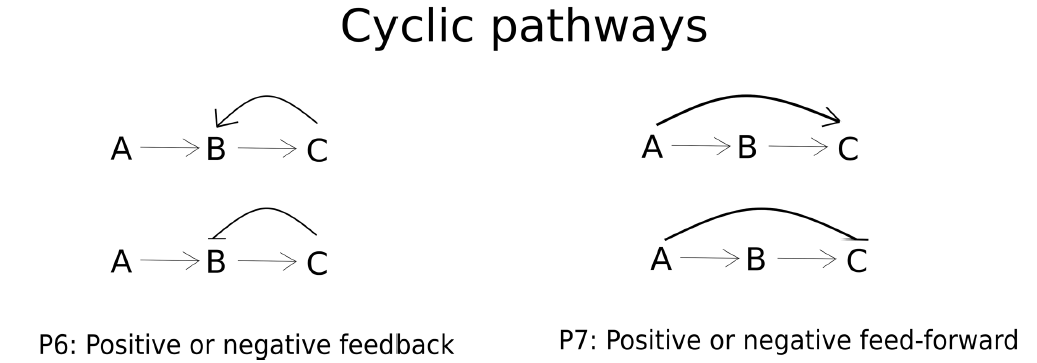

## Simulation